# 80 locations map
This (incomplete) notebook attempts to output OSMnx stats from a series of locations stored in a dataframe. It has not been tested, but the logic is in place.


In [27]:
import pandas as pd

# for spatial
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

import folium

In [6]:
#import csv to dataframe
df = pd.read_csv('Data/locations.csv')

In [7]:
df

,point_x,point_y,match_addr
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [8]:
# rename columns
df.columns = ['Longitude',
              'Latitude',
              'Location']
df

,Longitude,Latitude,Location
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [9]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,Longitude,Latitude,Location,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (-118.25652 33.95390)
...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",POINT (-118.57142 34.17699)


<AxesSubplot:>

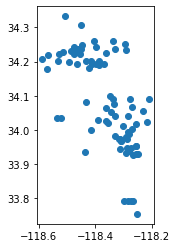

In [12]:
#plot gdf to see how cool it is that we converted to gdf from a csv file!!
gdf.plot()

In [39]:
gdf_wm = gdf.to_crs(epsg=3857)

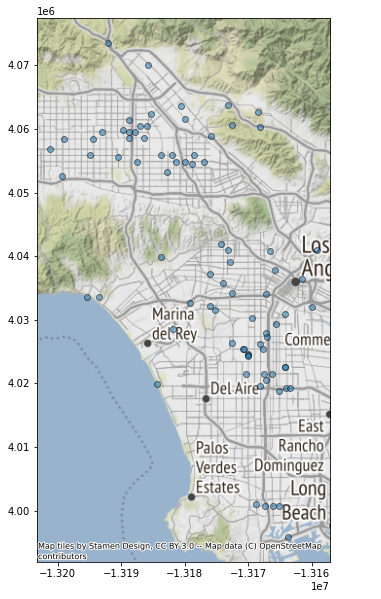

In [56]:
ax = gdf_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=10)

## Creating a function that will loop through our 80 locations

OSMnx References for this function:

- [graph from point](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_point)
- [Basic stats](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=simple%20stats#osmnx.stats.basic_stats)

In [13]:
# create a function 
def analyze_locations(lat,lon):
    # call osmnx with a lat/lon pair
    G = ox.graph.graph_from_point((lat,lon),dist=500)
    
    #project to webmercator 
    G = ox.project_graph(G, to_crs='epsg:3857')
    
    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # call the function that outputs the stats
    stats=ox.stats.basic_stats(G)

    # return observations as a dictionary
    d = dict()
    d['street_length_avg']=stats['street_length_avg']
    d['circuity_avg']=stats['circuity_avg']
    return d
analyze_locations(34.066662, -118.270324)

{'street_length_avg': 56.80329752066113, 'circuity_avg': 0.8791439162276214}

In [14]:
# test the function with a random lat/lon pair
analyze_locations(33.966213, -118.309024)

{'street_length_avg': 110.20643200000005, 'circuity_avg': 0.8331865107602208}

In [15]:
# loop through the dataframe and analyze
for index, row in gdf.iterrows():
    # call the function
    this_data = analyze_locations(row.Latitude,row.Longitude)
    
    # add data to the column you created
    gdf.loc[index, 'street_length_avg'] = this_data['street_length_avg']
    gdf.loc[index, 'circuity_avg'] = this_data['circuity_avg']
gdf

,Longitude,Latitude,Location,street_length_avg,circuity_avg,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",56.803298,0.879144,POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",86.086789,0.867980,POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",126.587173,0.847984,POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",71.061394,0.872849,POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",84.095027,0.830886,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",100.446474,0.834178,POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",110.206432,0.833187,POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",48.091607,0.860786,POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",85.774436,0.902206,POINT (-118.57142 34.17699)
